# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')

In [2]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [3]:
df.shape

(10886, 19)

In [4]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


Даних 10886 рядкків, колонок 19. В кожному рядку count це сума велосипедів орендованих за 1 годину. 

Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


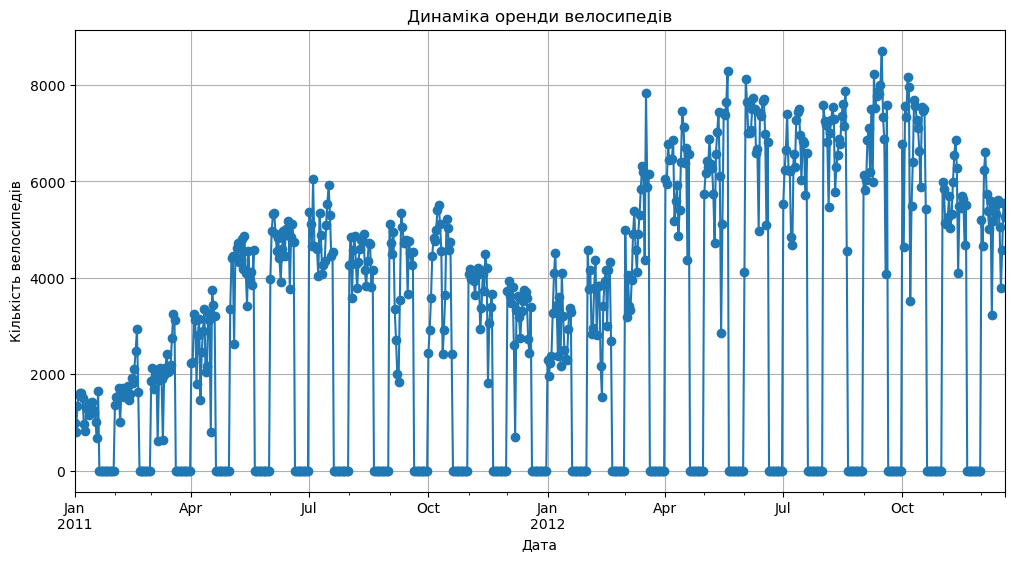

In [5]:
day_count = df["count"].resample("D").sum()
day_count.plot(
    marker="o",
    linestyle='-',
    kind="line",
    figsize=(12, 6),
    title="Динаміка оренди велосипедів",
    xlabel="Дата",
    ylabel="Кількість велосипедів",
    grid=True
);

**1. Графік має заломи, тому, що дані згруповані поденно, кількість оренд коливається по днях. Для того , щоб прибрати заломи , можна згрупувати по тижням або по місяцям.**

**2. Видно по графіку, що з листопада по березень кількість оренд менша. А з квітня по жовтень оренди підвищуються. Це видно і в 2011 році і в 2012році.**

**3. Так, сезонні коливання присутні. Весна, літо, осінь вища оренда , а зима нижча.**

**4. В 2011 році в серпні кіькість оренд зменшується,особливо в деякі дні, можливо це пов'язано з поганою погодою чи робочими днями. В 2012 році в березні є день з аномальним збільшенням оренд та в травні з аномально низьким зменшенням оренд. На це також може впливати погода та робочі дні.**


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

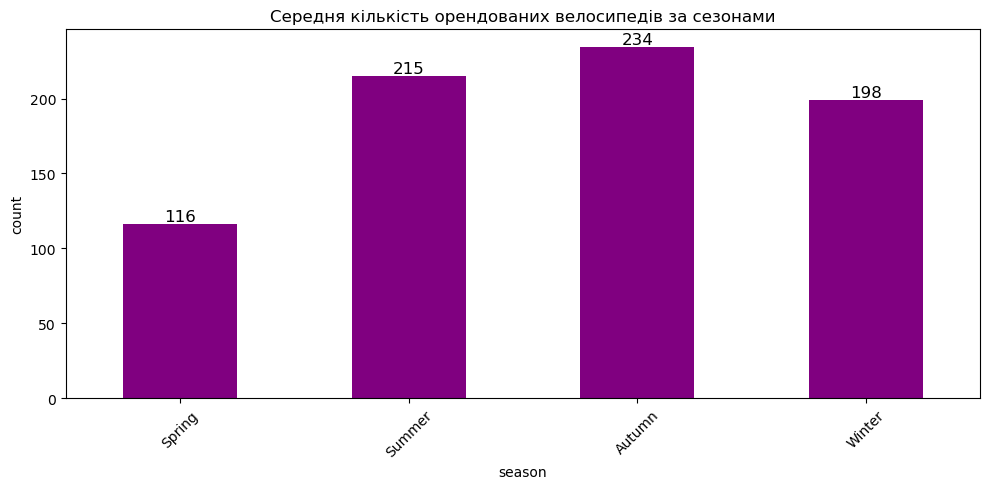

In [6]:
count_season = df.groupby("season")["count"].mean()
season_labels = {1: "Spring", 2: "Summer", 3: "Autumn", 4: "Winter"}
count_season.index = count_season.index.map(season_labels)
ax = count_season.plot.bar(
      figsize=(10, 5),
      color="purple",
      title="Середня кількість орендованих велосипедів за сезонами",
      ylabel="count"
)
for i, v in enumerate(count_season):
    ax.text(i, v + 2, str(int(v)),
    ha="center",
    fontsize=12)
plt.xlabel("season")
plt.xticks(rotation=45)
plt.tight_layout();
    

**1.Найбільша середня кількість оренди велосипедів - осінь.**

**2.Це може бути пов'язано з комфортною погодою для велопрогулянок, наприклад такі місяці, як вересень та жовтень теплі та не такі спекотні як влітку.**

**3.Найпопулярніший сезон - осінь. Найменш популяний - весна, думаю, що це пов'язано з тим, що березень і квітень, ще прохолодні для велопрогулянок.**



In [7]:
## Аналізуючи цей графік, мене насторожило,що найвища середня оренда припадає на осінь а найнижча на весну. 
## В описі колонок вказано , що season(1=весна, 2=літо, 3=осінь, 4= зима), але перевіривши я побачила, що це не
## відповідає дійсності. ##

for season in df["season"].unique():
    months = df[df["season"] == season]["month"].unique()
    print(f"Сезон {season}: місяці {sorted(months)}")

Сезон 1: місяці [1, 2, 3]
Сезон 2: місяці [4, 5, 6]
Сезон 3: місяці [7, 8, 9]
Сезон 4: місяці [10, 11, 12]


## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


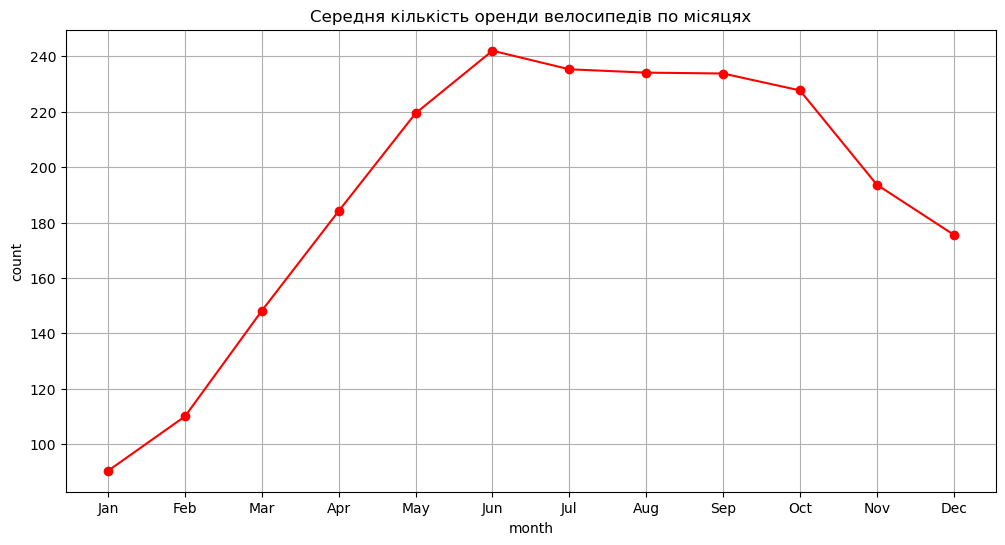

In [8]:
avg_monthly_count = df.groupby("month")["count"].mean()
ax = avg_monthly_count.plot(
    marker="o",
    color="red",
    figsize=(12, 6),
    title="Середня кількість оренди велосипедів по місяцях",
    xlabel="month",
    ylabel="count",
    grid=True
)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]);
    

**1.Пік оренди припадає червень-вересень(найбільший пік у червні),та спад припадає з жовтня - лютий(найнижчий в січні.**

**2.Ця закономірність не збігається з попереднім графіком.**

**3.Клімат напряму впливає на оренду велосипедів. Дощ, сніг, ожеледиця, вітер - знижує попит на велосипеди. А гарна сонячна погода навпаки збільшує попит.** 



## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

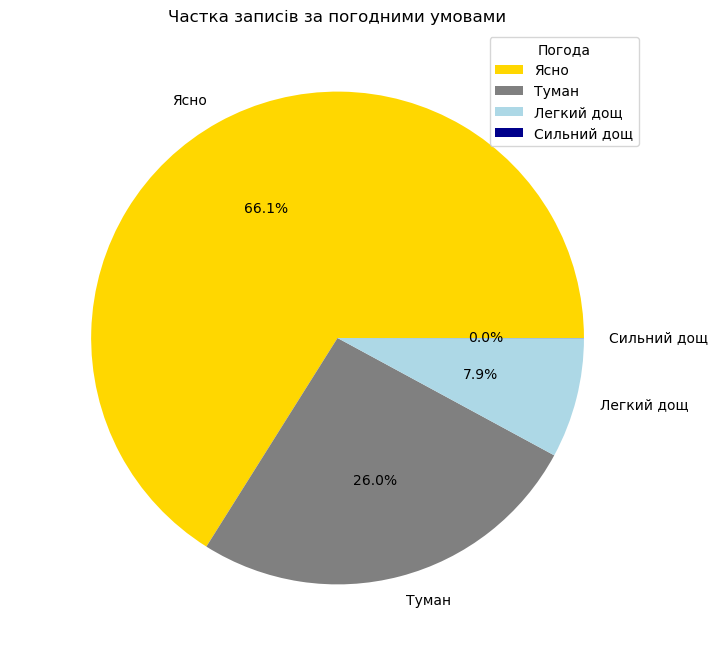

In [9]:
part_weather = df.groupby("weather").size()
weather_labels = {1: "Ясно",2: "Туман", 3: "Легкий дощ", 4: "Сильний дощ"}
ax = part_weather.plot.pie(
    figsize=(8, 8),
    autopct="%1.1f%%",
    labels=[weather_labels[i] for i in part_weather.index],
    colors=["#FFD700", "#808080", "#ADD8E6", "#00008B"],
    ylabel=" "
)
plt.title("Частка записів за погодними умовами")
plt.legend(title="Погода");

**1.Переважає ясна погода - 66.1%.**

**2.На круговій діаграмі дні з сильним дощем відсутні - 0.0%, але я вирішила подивитись чи дійсно в даних немає записів з індексом 4=Сильний дощ, і виявилось, що є. Можу приаустити, що ця частка дуже мала і при округлені вийшло 0.0%**

**3.Погодні умови дуже впливають на попит оренди велосипедів, в ясну погоду найбільший попит, в легкий дощ орендують, але набагато менше**

In [10]:
rain_weather = (df["weather"] == 4).any()
rain_weather

True

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

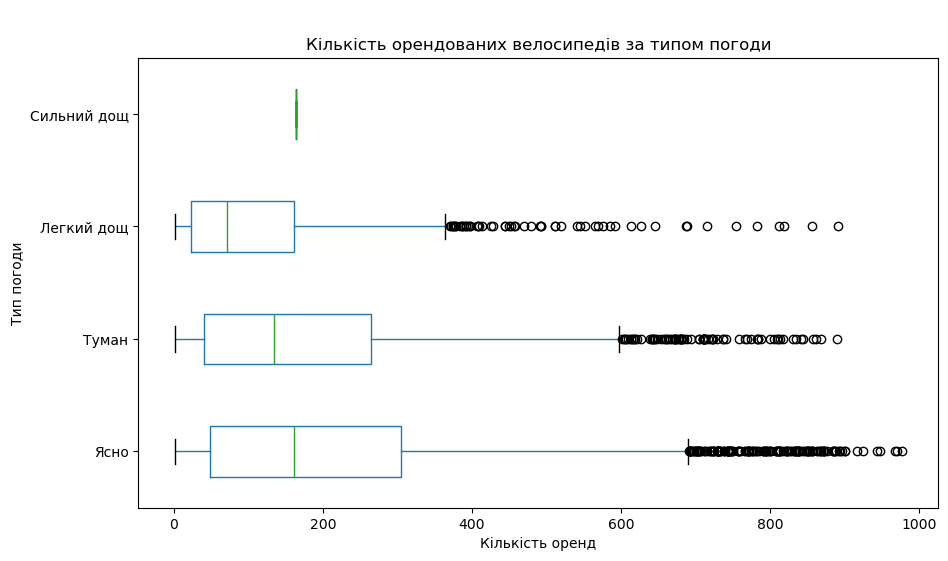

In [11]:
weather_labels = {1: "Ясно", 2: "Туман", 3: "Легкий дощ", 4: "Сильний дощ"}
df["weather_labels"] = df["weather"].map(weather_labels)
df["weather_labels"] = pd.Categorical(
    df["weather_labels"],
    categories=["Ясно", "Туман", "Легкий дощ", "Сильний дощ"],
    ordered=True
   )
ax = df.boxplot(
    column="count",
    by="weather_labels",
    figsize=(10, 6),
    vert=False,
    grid=False,
)
plt.title("Кількість орендованих велосипедів за типом погоди")
plt.suptitle(" ")
plt.xlabel("Кількість оренд")
plt.ylabel("Тип погоди");

**1.Найбільший розкид при погоді - Ясно.**

**2.Викиди в даних є при погоді - Ясно, Туман та Легкий дощ.**

**3.Медіанне значення оренди найвище за погодою - Ясно.**

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

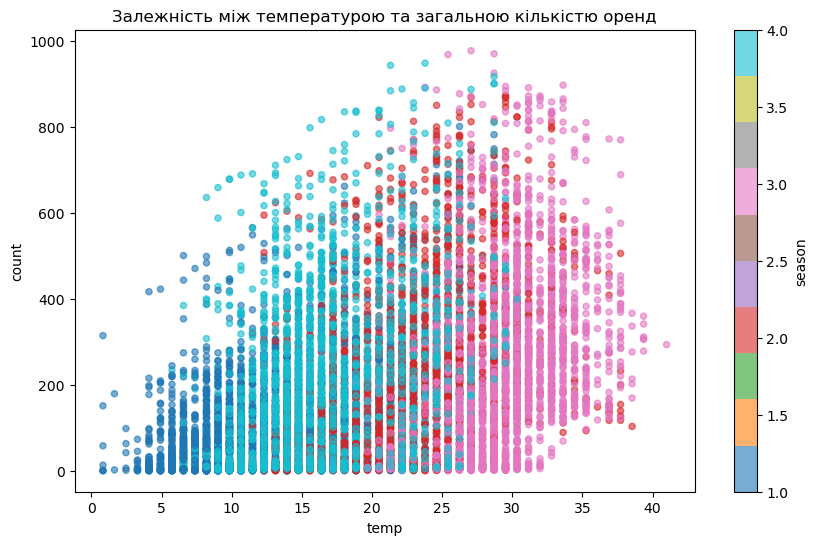

In [12]:
ax = df.plot.scatter(
    x="temp",
    y="count",
    c="season",
    colormap="tab10",
    title="Залежність між температурою та загальною кількістю оренд",
    figsize=(10, 6),
    alpha=0.6
);

**Так,між температурою та загальною кількістю оренд є позитивна кореляція. При підвищенні температури зростає кількість орендованих велосипедів. При низьких температурах оренди зменшуються(0-10градусів)але й при дуже високих(понад 35градусів), теж оренди трохи йдуть на зменшення.Найвища оренда при температурі(20-30градусів).**

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

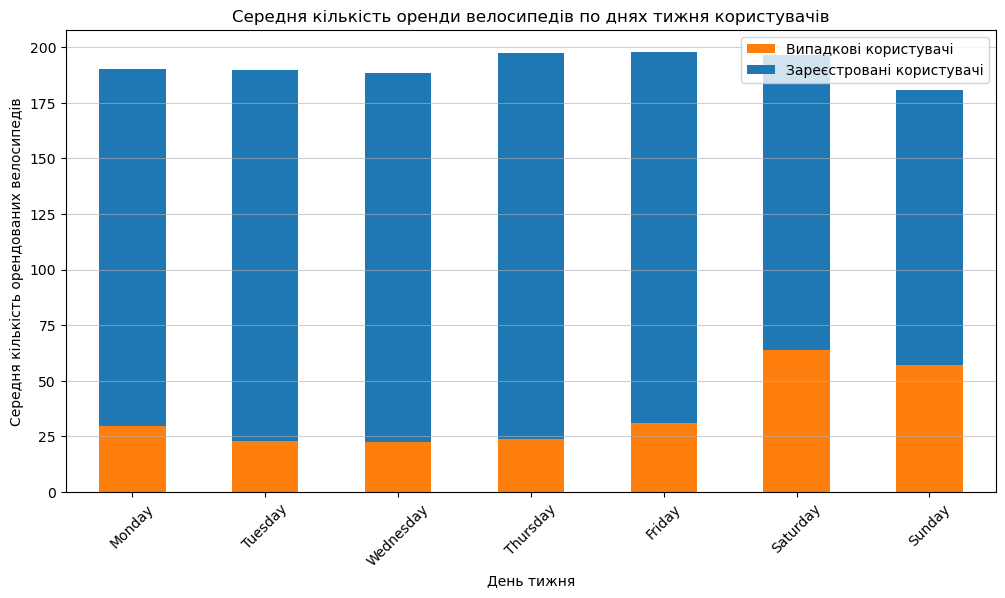

In [19]:
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["weekday"] = pd.Categorical(df["weekday"], categories=weekday_names, ordered=True)
daily_users = df.groupby("weekday", observed=True)[["casual", "registered"]].mean()
daily_users.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=("#ff7f0e", "#1f77b4"),
    title="Середня кількість оренди велосипедів по днях тижня користувачів"
)
plt.xlabel("День тижня")
plt.ylabel("Середня кількість орендованих велосипедів")
plt.legend(["Випадкові користувачі", "Зареєстровані користувачі"])
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.6);


**1.Більше оренд від зареєстораних користувачів в робочі дні, тобто з Понеділка по П'ятницю.**

**2.В вихідні дні майже вдвічі зростає оренда незареєстрованими користувачами , ніж в робочі.А у робочі дні переважають зареєстровані. Припускаю,що це пов'язано з тим, що зареєстровані люди використовуються велосипедами для їзди на роботу, а випадкові користувачі це люди які орендують для відпочинку, це відбувається саме в вихідні дні.**